In [2]:
%matplotlib inline

import networkx as nx
import os
import sklearn.cluster
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [10]:
# !python -m pip install louvain

In [11]:
def readfeaturelist(filename):
    """
    reads a featurelist file and returns a list of the feature names
    """
    with open(filename) as f:
        out = []        # list of feature names
        for line in f:
            out.append(line.strip())
        return sorted(out)

In [24]:
# features = readfeaturelist('')
# print (len(features))

In [4]:

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline


In [19]:
import infomap

In [20]:
def read_nodeadjlist(filename):
    G = nx.DiGraph()
    for line in open(filename):
        lst = line.split(' ')
        el, es = lst[0], lst[1][:-1]
        G.add_edge(int(el),int(es))
    return G

In [27]:
from networkx.algorithms import community
G = read_nodeadjlist("twitter/237845487.edges")

In [28]:
def findCommunities(G):
    """
    Partition network with the Infomap algorithm.
    Annotates nodes with 'community' id and return number of communities found.
    """
    infomapWrapper = infomap.Infomap("--two-level --silent --directed")

    print("Building Infomap network from a NetworkX graph...")
    for e in G.edges():
        infomapWrapper.addLink(*e)

    print("Find communities with Infomap...")
    infomapWrapper.run();
    infomapWrapper.iterTree()

#     tree = infomapWrapper.tree
    print("Found %d modules with codelength: %f" % (infomapWrapper.numTopModules(), infomapWrapper.codelength()))

    communities = {}
    for node in infomapWrapper.iterTree():
        communities[node.physicalId] = node.moduleIndex()
    nx.set_node_attributes(G, name='community', values=communities)
    print(communities)
    return infomapWrapper.numTopModules()

In [29]:
findCommunities(G)

Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 6 modules with codelength: 4.438695
{0: 5, 6017542: 0, 14755492: 0, 248917209: 0, 12611642: 1, 15227791: 1, 15846682: 1, 17060265: 1, 18520053: 1, 18713254: 1, 19279990: 1, 20448269: 1, 28521141: 1, 33051095: 1, 128956175: 1, 149217510: 1, 264045662: 1, 544517731: 1, 14134204: 2, 17093617: 2, 18822966: 2, 21692297: 2, 57107167: 2, 14328339: 3, 15857462: 3, 21596877: 3, 22027992: 3, 24646282: 3, 28995973: 3, 31257471: 3, 31685653: 3, 36628828: 3, 177378039: 3, 214589342: 3, 214589522: 3, 415752096: 3, 18948541: 4, 21414413: 4, 22324642: 4, 28562317: 4, 90420314: 4, 246481013: 4, 79797834: 5}


6

In [30]:
def drawNetwork(G):
    pos = nx.spring_layout(G)
    communities = [v for k,v in nx.get_node_attributes(G, 'community').items()]
    numCommunities = max(communities) + 1
    cmapLight = colors.ListedColormap(['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6'], 'indexed', numCommunities)
    cmapDark = colors.ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'], 'indexed', numCommunities)
    nx.draw_networkx_edges(G, pos)
    nodeCollection = nx.draw_networkx_nodes(G,
        pos =pos,
        node_color = communities,
        cmap = cmapLight
    )
    darkColors = [cmapDark(v) for v in communities]
    nodeCollection.set_edgecolor(darkColors)
    plt.axis('off')
    plt.show()

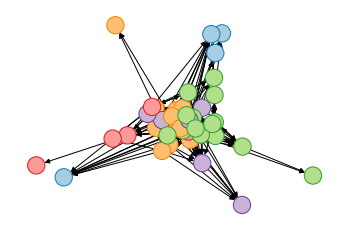

In [31]:
drawNetwork(G)